In [4]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.feature_selection import RFE, f_regression
from sklearn.linear_model import (LinearRegression, Ridge, Lasso, RandomizedLasso)
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor

In [38]:
df = pd.read_csv('NewCompsData5.csv', names=['Company','EV','TTM Revenue','Ev/Rev Multiple','Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'EBITDA Margin', 'Profit Margin'])
df[['EV','TTM Revenue','Ev/Rev Multiple','Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'EBITDA Margin', 'Profit Margin']] = df[['EV', 'TTM Revenue','Ev/Rev Multiple','Rev Growth','GP Margin','R&D Margin', 'S&M Margin', 'EBITDA Margin', 'Profit Margin']].apply(pd.to_numeric)

In [21]:
df

,Company,EV,TTM Revenue,Rev Growth,GP Margin,R&D Margin,S&M Margin,EBITDA Margin,Profit Margin
0,RHT US Equity,19172.8344,3156.587000,0.140213,0.852368,0.183214,0.379706,0.190930,0.132112
1,CA US Equity,17761.3932,4148.000000,0.033149,0.854870,0.154773,0.255786,0.347155,0.189982
2,CHKP US Equity,12991.4501,1896.927000,0.033458,0.895454,0.101420,0.228489,0.500626,0.433661
3,TEAM US Equity,15390.5118,947.424000,0.324274,0.812349,0.438849,0.198422,0.045933,-0.318113
4,CSU CN Equity,14085.4127,2794.515000,0.164258,0.880066,0.122168,0.064734,0.253076,0.103233
5,SPLK US Equity,12778.3399,1448.318000,0.288999,0.792802,0.207906,0.558176,-0.177660,-0.220927
6,FTNT US Equity,12362.8016,1631.185000,0.170749,0.749036,0.129117,0.429765,0.131057,0.083799
7,CTXS US Equity,14433.0596,2908.339000,0.028465,0.847022,0.142969,0.345940,0.306661,0.203087
8,SNPS US Equity,13254.6572,3022.620000,0.071620,0.764383,0.300680,0.181713,0.215145,0.121526
9,CDNS US Equity,12773.6140,2069.894000,0.063581,0.882648,0.388533,0.202504,0.250359,0.167930


C:\ProgramData\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:140: RuntimeWarning: Degrees of freedom <= 0 for slice
  keepdims=keepdims)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:132: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\bandwidths.py:20: RuntimeWarning: invalid value encountered in minimum
  return np.minimum(np.std(X, axis=0, ddof=1), IQR)
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:83: RuntimeWarnin

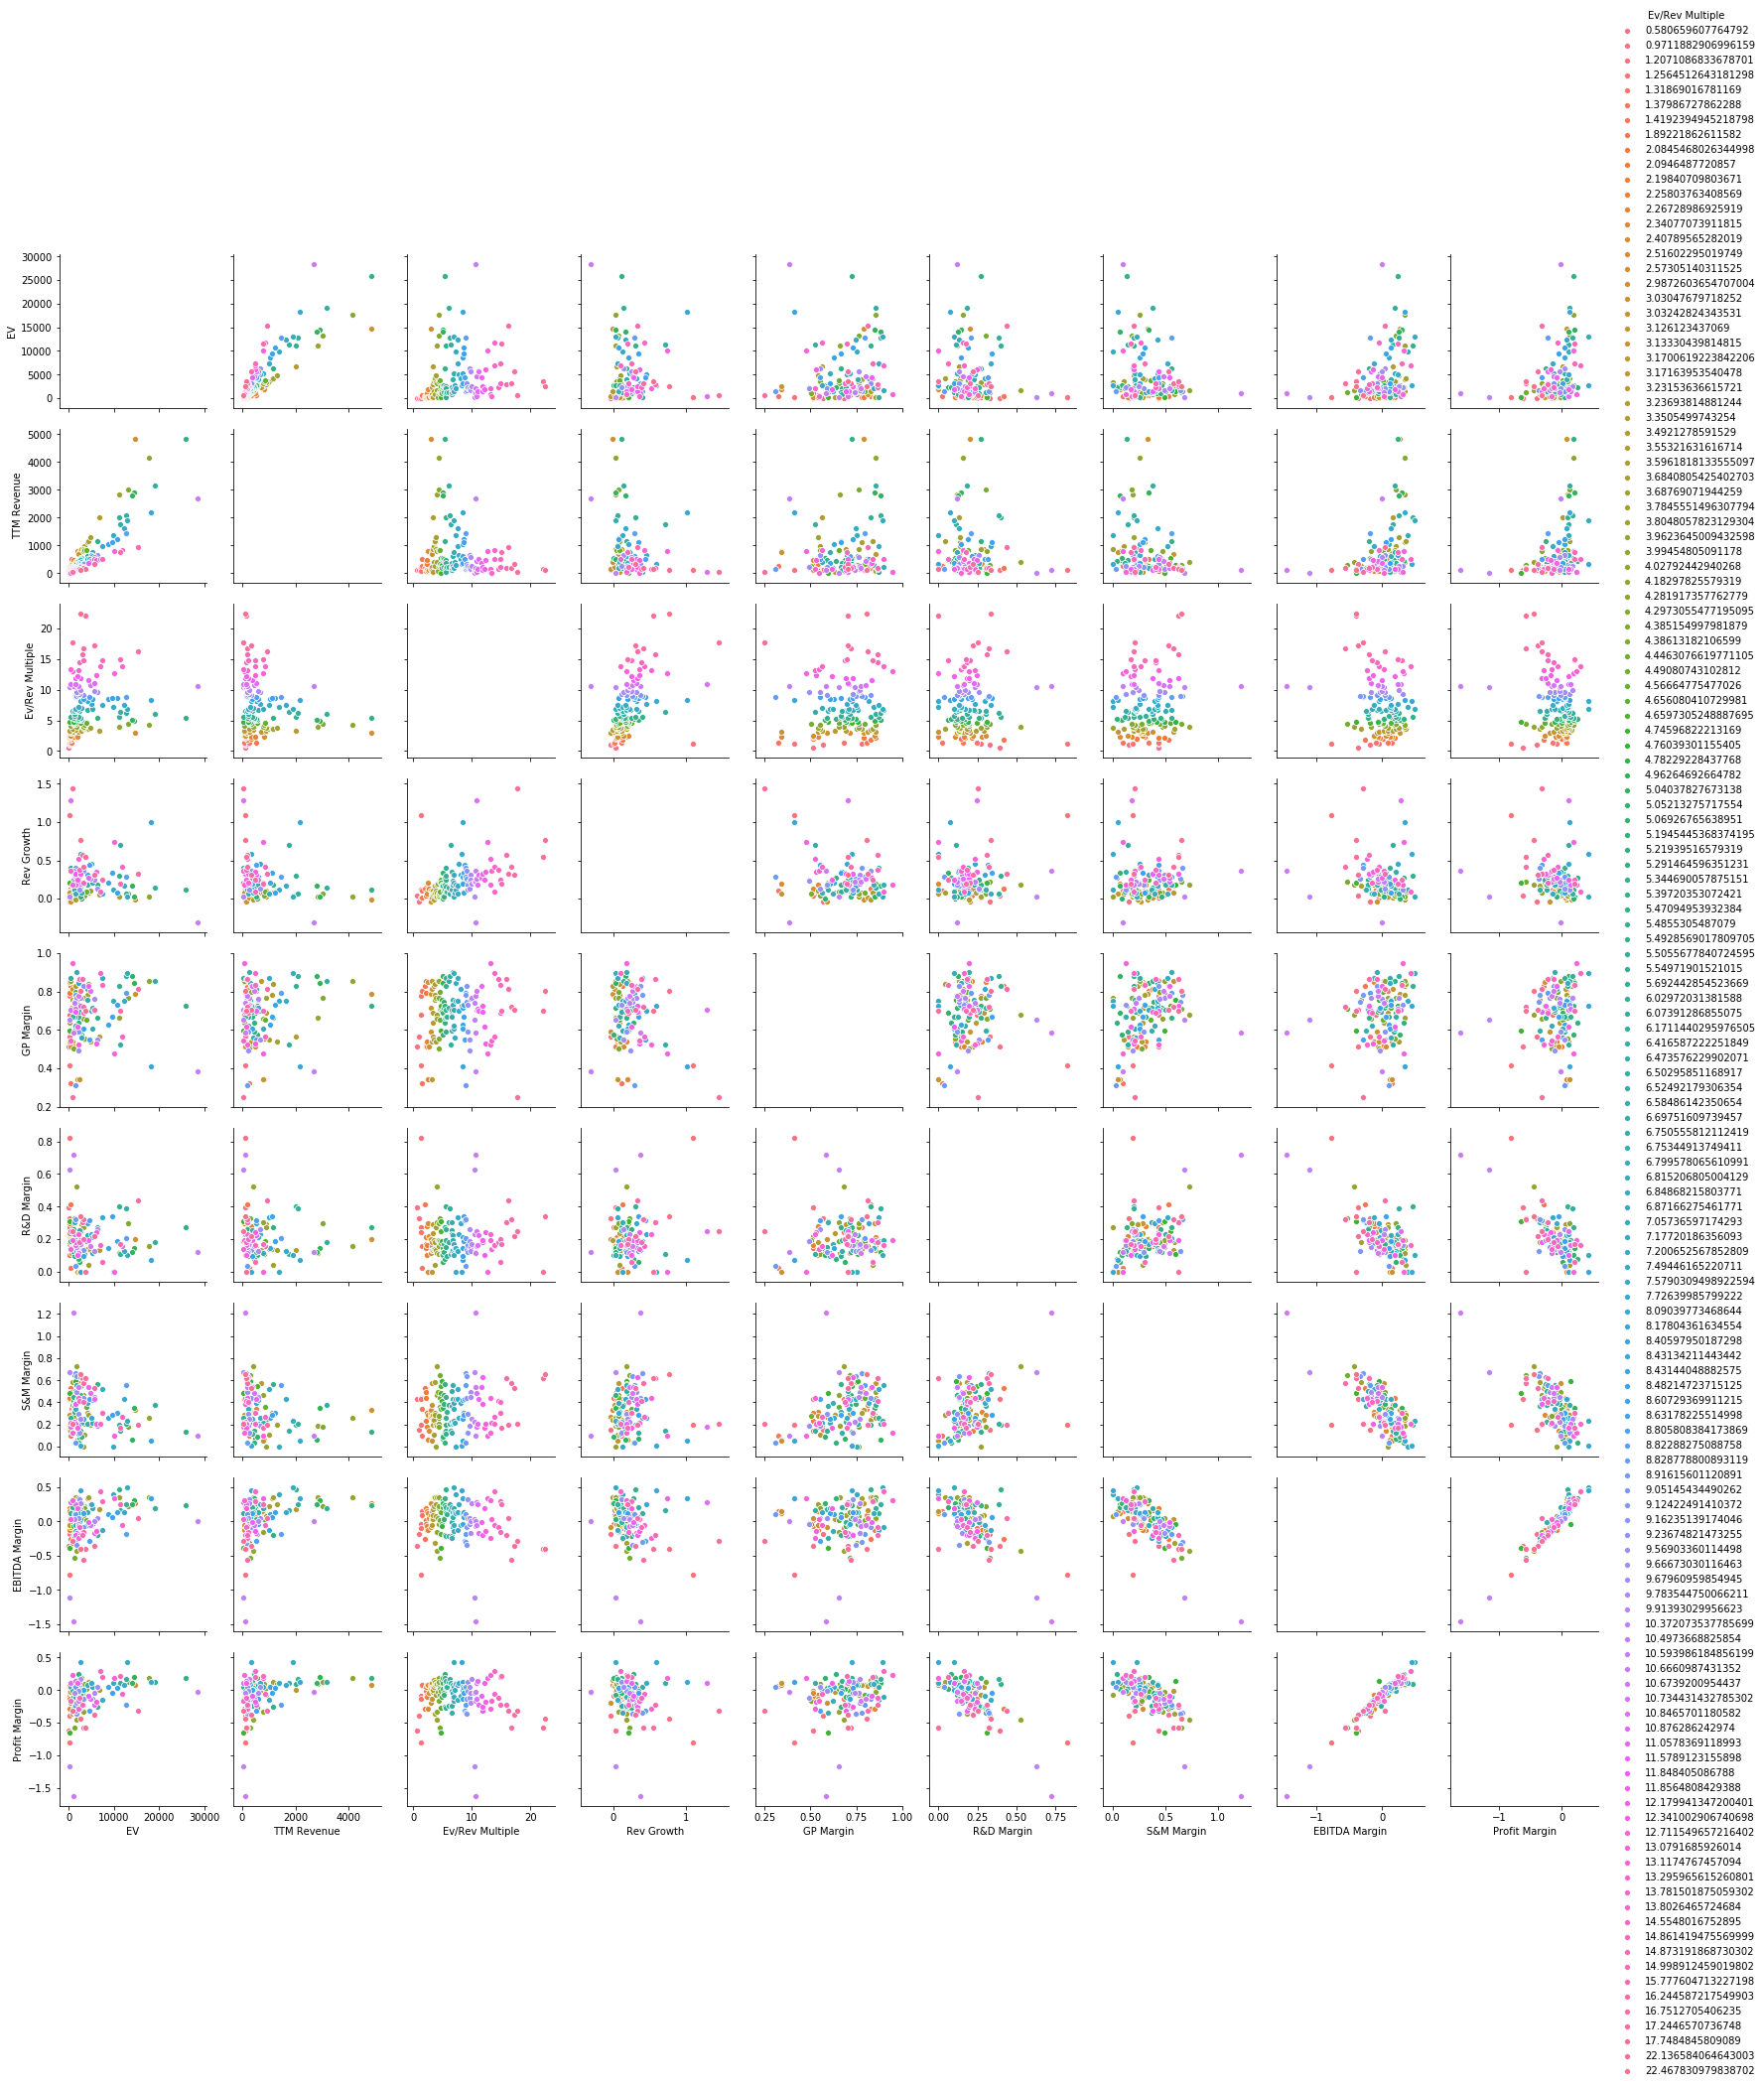

In [12]:
g = sns.pairplot(df, hue = 'Ev/Rev Multiple')

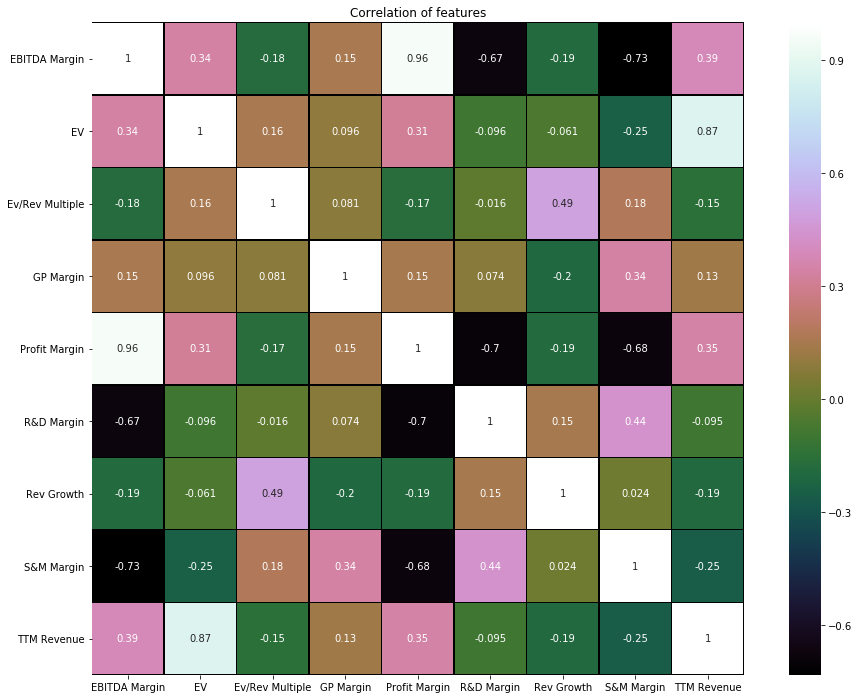

In [14]:
str_list = [] # empty list to contain columns with strings (words)
for colname, colvalue in df.iteritems():
    if type(colvalue[1]) == str:
         str_list.append(colname)
# Get to the numeric columns by inversion            
num_list = df.columns.difference(str_list) 
# Create Dataframe containing only numerical features
df_num = df[num_list]
f, ax = plt.subplots(figsize=(16, 12))
plt.title('Correlation of features')
# Draw the heatmap using seaborn
#sns.heatmap(house_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="PuBuGn", linecolor='k', annot=True)
sns.heatmap(df_num.astype(float).corr(),linewidths=0.25,vmax=1.0, square=True, cmap="cubehelix", linecolor='k', annot=True)

In [39]:
# First extract the target variable which is our House prices
Y = y = df[['Ev/Rev Multiple']]
Y = Y.values.ravel()
# Drop price from the house dataframe and create a matrix out of the house data
df = df.drop(['Ev/Rev Multiple', 'Company'], axis=1)
X = df.as_matrix()
# Store the column/feature names into a list "colnames"
colnames = df.columns

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  


In [40]:
# Define dictionary to store our rankings
ranks = {}
# Create our function which stores the feature rankings to the ranks dictionary
def ranking(ranks, names, order=1):
    minmax = MinMaxScaler()
    ranks = minmax.fit_transform(order*np.array([ranks]).T).T[0]
    ranks = map(lambda x: round(x,2), ranks)
    return dict(zip(names, ranks))

In [41]:
# Finally let's run our Selection Stability method with Randomized Lasso
rlasso = RandomizedLasso(alpha=0.04)
rlasso.fit(X, Y)
ranks["rlasso/Stability"] = ranking(np.abs(rlasso.scores_), colnames)
print('finished')

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLasso is deprecated; The class RandomizedLasso is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


finished


In [42]:
# Construct our Linear Regression model
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
#stop the search when only the last feature is left
rfe = RFE(lr, n_features_to_select=1, verbose =3 )
rfe.fit(X,Y)
ranks["RFE"] = ranking(list(map(float, rfe.ranking_)), colnames, order=-1)

Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.


In [43]:
# Using Linear Regression
lr = LinearRegression(normalize=True)
lr.fit(X,Y)
ranks["LinReg"] = ranking(np.abs(lr.coef_), colnames)

# Using Ridge 
ridge = Ridge(alpha = 7)
ridge.fit(X,Y)
ranks['Ridge'] = ranking(np.abs(ridge.coef_), colnames)

# Using Lasso
lasso = Lasso(alpha=.05)
lasso.fit(X, Y)
ranks["Lasso"] = ranking(np.abs(lasso.coef_), colnames)

In [44]:
rf = RandomForestRegressor(n_jobs=-1, n_estimators=50, verbose=3)
rf.fit(X,Y)
ranks["RF"] = ranking(rf.feature_importances_, colnames);

building tree 1 of 50building tree 2 of 50

building tree 3 of 50
building tree 4 of 50
building tree 5 of 50building tree 6 of 50

building tree 7 of 50
building tree 8 of 50
building tree 9 of 50
building tree 10 of 50
building tree 11 of 50
building tree 12 of 50
building tree 13 of 50building tree 14 of 50building tree 15 of 50


building tree 16 of 50
building tree 17 of 50
building tree 18 of 50
building tree 19 of 50building tree 20 of 50

building tree 21 of 50
building tree 22 of 50building tree 23 of 50

building tree 24 of 50
building tree 25 of 50
building tree 26 of 50
building tree 27 of 50
building tree 28 of 50
building tree 29 of 50
building tree 30 of 50
building tree 31 of 50
building tree 32 of 50
building tree 33 of 50
building tree 34 of 50building tree 35 of 50

building tree 36 of 50
building tree 37 of 50building tree 38 of 50

building tree 39 of 50
building tree 40 of 50
building tree 41 of 50building tree 42 of 50

building tree 43 of 50
building tree 44 of 

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    0.0s finished


In [45]:
r = {}
for name in colnames:
    r[name] = round(np.mean([ranks[method][name] 
                             for method in ranks.keys()]), 2)
 
methods = sorted(ranks.keys())
ranks["Mean"] = r
methods.append("Mean")
 
print("\t%s" % "\t".join(methods))
for name in colnames:
    print("%s\t%s" % (name, "\t".join(map(str, 
                         [ranks[method][name] for method in methods]))))

	Lasso	LinReg	RF	RFE	Ridge	rlasso/Stability	Mean
EV	0.0	0.0	0.26	0.0	0.0	0.58	0.14
TTM Revenue	0.0	0.0	0.04	0.14	0.0	0.14	0.05
Rev Growth	1.0	0.58	1.0	1.0	1.0	1.0	0.93
GP Margin	0.27	0.73	0.04	0.86	0.35	0.34	0.43
R&D Margin	0.08	1.0	0.01	0.71	0.27	0.1	0.36
S&M Margin	0.39	0.16	0.01	0.43	0.33	0.26	0.26
EBITDA Margin	0.0	0.29	0.0	0.57	0.18	0.18	0.2
Profit Margin	0.0	0.28	0.13	0.29	0.19	0.0	0.15


In [46]:
# Put the mean scores into a Pandas dataframe
meanplot = pd.DataFrame(list(r.items()), columns= ['Feature','Mean Ranking'])

# Sort the dataframe
meanplot = meanplot.sort_values('Mean Ranking', ascending=False)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


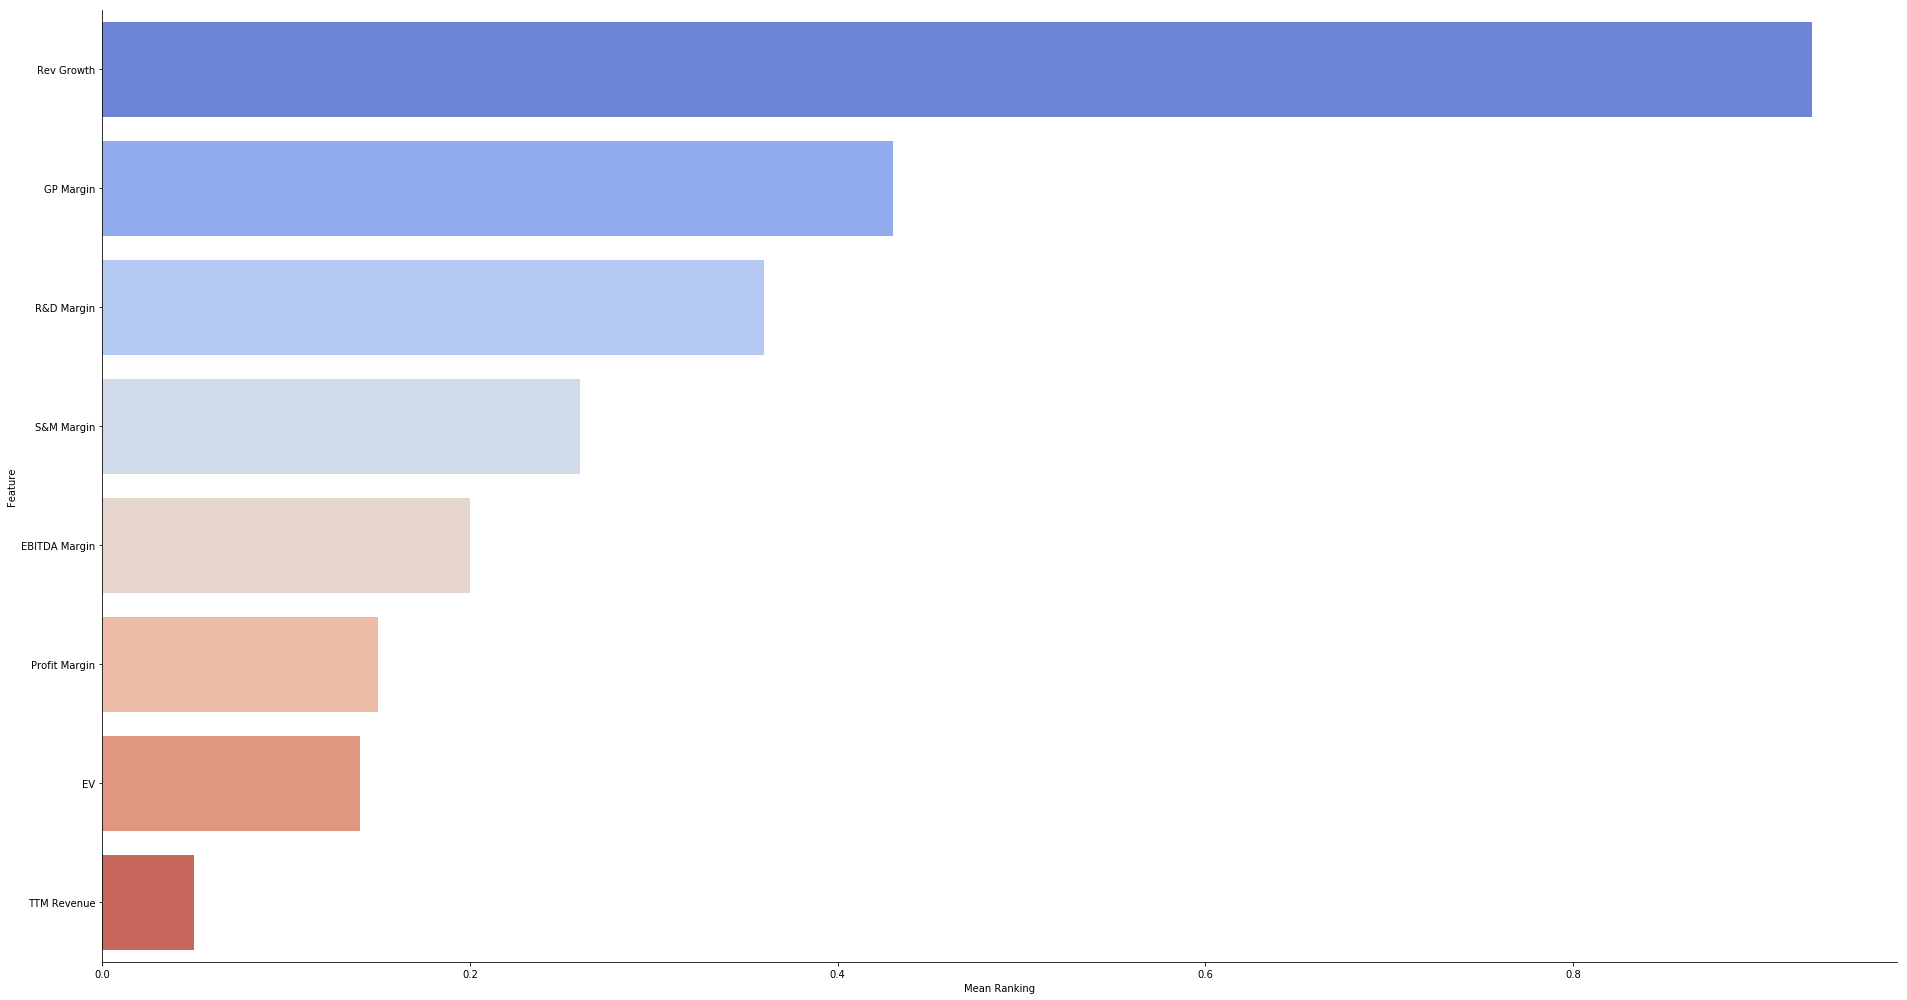

In [48]:
# Let's plot the ranking of the features
sns.factorplot(x="Mean Ranking", y="Feature", data = meanplot, kind="bar", 
               size=14, aspect=1.9, palette='coolwarm');